<a href="https://colab.research.google.com/github/Kevin-Cutler/Final-Project/blob/Kevin_Test_Branch/Class_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt






In [39]:
movies_df = pd.read_csv("/content/movies.csv")
movies_df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [40]:
# Check for duplicates in the dataset movies_df
print(f"Duplicate entries: {movies_df.duplicated().sum()}")

Duplicate entries: 0


In [41]:

top_4000_movies_df = pd.read_csv("/content/top_4000_movies_data.csv")
top_4000_movies_df.head(20)

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
0,4/23/2019,Avengers: Endgame,400000000,858373000,2797800564
1,5/20/2011,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,4/22/2015,Avengers: Age of Ultron,365000000,459005868,1395316979
3,12/16/2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,4/25/2018,Avengers: Infinity War,300000000,678815482,2044540523
5,5/24/2007,Pirates of the Caribbean: At World’s End,300000000,309420425,960996492
6,11/13/2017,Justice League,300000000,229024295,655945209
7,10/6/2015,Spectre,300000000,200074175,879500760
8,12/18/2019,Star Wars: The Rise of Skywalker,275000000,515202542,1072848487
9,5/23/2018,Solo: A Star Wars Story,275000000,213767512,393151347


In [42]:
# Check for duplicates in the dataset top_4000_movies_df
print(f"Duplicate entries: {top_4000_movies_df.duplicated().sum()}")

Duplicate entries: 0


In [43]:
top_4000_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release Date       3979 non-null   object
 1   Movie Title        4000 non-null   object
 2   Production Budget  4000 non-null   int64 
 3   Domestic Gross     4000 non-null   int64 
 4   Worldwide Gross    4000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 156.4+ KB


In [44]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [45]:
# See what data you have available
movies_df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [46]:
# movies_df.drop_duplicates(subset=['name'],keep='last')

In [47]:
# See what data you have available
top_4000_movies_df.columns

Index(['Release Date', 'Movie Title', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross'],
      dtype='object')

In [48]:

# top_4000_movies_df.drop_duplicates(subset=['Movie Title'], keep='last')

In [49]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [50]:
# Combine the data into a single dataset.
Merged_Movie_df = top_4000_movies_df.merge( movies_df,left_on='Movie Title', right_on='name')
Merged_Movie_df.head(100)

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,11/13/2017,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,10/6/2015,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5/22/2019,Aladdin,182000000,355559216,1046649706,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
96,11/11/1992,Aladdin,28000000,217350219,504050219,Aladdin,G,Animation,1992,"November 25, 1992 (United States)",8.0,382000.0,Ron Clements,Ron Clements,Scott Weinger,United States,28000000.0,5.040502e+08,Walt Disney Pictures,90.0
97,11/11/1992,Aladdin,28000000,217350219,504050219,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
98,10/25/2017,Thor: Ragnarok,180000000,315058289,850482778,Thor: Ragnarok,PG-13,Action,2017,"November 3, 2017 (United States)",7.9,628000.0,Taika Waititi,Eric Pearson,Chris Hemsworth,United States,180000000.0,8.539839e+08,Walt Disney Pictures,130.0


In [51]:
# Check for duplicates in the dataset Merged_Movie_df
print(f"Duplicate entries: {Merged_Movie_df.duplicated().sum()}")

Duplicate entries: 0


In [52]:
Merged_Movie_df.nunique()

Release Date         1862
Movie Title          2923
Production Budget     244
Domestic Gross       2959
Worldwide Gross      2961
name                 2923
rating                  8
genre                  14
year                   41
released             1732
score                  69
votes                 633
director             1287
writer               1933
star                 1031
country                36
budget                241
gross                3033
company               735
runtime               124
dtype: int64

In [17]:


#from google.colab import files
#Merged_Movie_df.to_csv('Merged_Movie.csv') 
#files.download('Merged_Movie.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
Merged_Movie_df.columns

Index(['Release Date', 'Movie Title', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'name', 'rating', 'genre', 'year', 'released',
       'score', 'votes', 'director', 'writer', 'star', 'country', 'budget',
       'gross', 'company', 'runtime'],
      dtype='object')

In [54]:
Merged_Movie_df.rename(columns={'Release Date':'Release_Date', 'Movie Title':'Movie_Title', 'Production Budget':'Production_Budget', 'Domestic Gross':'Domestic_Gross',
       'Worldwide Gross':'Worldwide_Gross'},inplace=True)

In [22]:
Merged_Movie_df.head()

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,11/13/2017,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,10/6/2015,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [55]:
Merged_Movie_df.score.unique()

array([8.4, 7.3, 6.1, 6.8, 6.9, 6.6, 6.4, 8.5, 7.7, 6.2, 7.8, 7.6, 7.4,
       6. , 6.5, 3.8, 8. , 7. , 5.8, 5.2, 5.6, 5.3, 7.2, 8.2, 7.1, 6.3,
       7.9, 5.5, 5.4, 6.7, 9. , 7.5, 8.1, 5.9, 4.9, 8.6, 8.8, 5.7, 4. ,
       5.1, 5. , 4.8, 4.6, 3.9, 4.2, 8.3, 3.4, 2.2, 4.5, 8.9, 8.7, 4.3,
       3.3, 4.7, 3.1, 3.7, 4.4, 2.5, 2.7, 4.1, 2.8, 3.5, 9.3, 2.9, 2.4,
       1.9, 3.2, 3.6, 2.1])

In [56]:
# Transform the score into over 5 or under 5 categories

def change_score_to_Category(IMDB):
  if IMDB >= 5 :
    return "Favorable"
  else: 
    return "Unfavorable"

Merged_Movie_df['score'] = Merged_Movie_df['score'].apply(change_score_to_Category)
Merged_Movie_df.head()
  

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,11/13/2017,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,10/6/2015,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [119]:
#from google.colab import files
#Merged_Movie_df.to_csv('Merged_Movie.csv') 
#files.download('Merged_Movie.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
Merged_Movie_df.nunique()

Release_Date         1862
Movie_Title          2923
Production_Budget     244
Domestic_Gross       2959
Worldwide_Gross      2961
name                 2923
rating                  8
genre                  14
year                   41
released             1732
score                   2
votes                 633
director             1287
writer               1933
star                 1031
country                36
budget                241
gross                3033
company               735
runtime               124
dtype: int64

In [58]:
Merged_Movie_df.dtypes

Release_Date          object
Movie_Title           object
Production_Budget      int64
Domestic_Gross         int64
Worldwide_Gross        int64
name                  object
rating                object
genre                 object
year                   int64
released              object
score                 object
votes                float64
director              object
writer                object
star                  object
country               object
budget               float64
gross                float64
company               object
runtime              float64
dtype: object

In [59]:
# Check for null values
for column in Merged_Movie_df.columns:
    print(f"Column {column} has {Merged_Movie_df[column].isnull().sum()} null values")

Column Release_Date has 0 null values
Column Movie_Title has 0 null values
Column Production_Budget has 0 null values
Column Domestic_Gross has 0 null values
Column Worldwide_Gross has 0 null values
Column name has 0 null values
Column rating has 4 null values
Column genre has 0 null values
Column year has 0 null values
Column released has 1 null values
Column score has 0 null values
Column votes has 0 null values
Column director has 0 null values
Column writer has 0 null values
Column star has 0 null values
Column country has 1 null values
Column budget has 117 null values
Column gross has 7 null values
Column company has 1 null values
Column runtime has 2 null values


In [60]:
# Drop Null Rows

Merged_Movie_df = Merged_Movie_df.dropna()

In [61]:
# Check for null values
for column in Merged_Movie_df.columns:
    print(f"Column {column} has {Merged_Movie_df[column].isnull().sum()} null values")

Column Release_Date has 0 null values
Column Movie_Title has 0 null values
Column Production_Budget has 0 null values
Column Domestic_Gross has 0 null values
Column Worldwide_Gross has 0 null values
Column name has 0 null values
Column rating has 0 null values
Column genre has 0 null values
Column year has 0 null values
Column released has 0 null values
Column score has 0 null values
Column votes has 0 null values
Column director has 0 null values
Column writer has 0 null values
Column star has 0 null values
Column country has 0 null values
Column budget has 0 null values
Column gross has 0 null values
Column company has 0 null values
Column runtime has 0 null values


In [62]:
Merged_Movie_df.columns

Index(['Release_Date', 'Movie_Title', 'Production_Budget', 'Domestic_Gross',
       'Worldwide_Gross', 'name', 'rating', 'genre', 'year', 'released',
       'score', 'votes', 'director', 'writer', 'star', 'country', 'budget',
       'gross', 'company', 'runtime'],
      dtype='object')

In [63]:
# Transform Production_Budget column to scale for the model
Merged_Movie_df['Production_Budget'] =  Merged_Movie_df['Production_Budget']/100000

Merged_Movie_df.head()


,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,4000.0,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,3650.0,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,3000.0,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,11/13/2017,Justice League,3000.0,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,10/6/2015,Spectre,3000.0,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [64]:
# Transform Domestic_Gross column to scale for the model
Merged_Movie_df['Domestic_Gross'] = Merged_Movie_df['Domestic_Gross']/100000

Merged_Movie_df.head()

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,4000.0,8583.73000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,3650.0,4590.05868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,3000.0,6788.15482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,11/13/2017,Justice League,3000.0,2290.24295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,10/6/2015,Spectre,3000.0,2000.74175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [65]:
# Transform Worldwide_Gross column to scale for the model
Merged_Movie_df['Worldwide_Gross'] = Merged_Movie_df['Worldwide_Gross']/100000

Merged_Movie_df.head()

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,4000.0,8583.73000,27978.00564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,3650.0,4590.05868,13953.16979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,3000.0,6788.15482,20445.40523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,11/13/2017,Justice League,3000.0,2290.24295,6559.45209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,10/6/2015,Spectre,3000.0,2000.74175,8795.00760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [66]:
# Transform budget column to scale for the model
Merged_Movie_df['budget'] = Merged_Movie_df['budget']/100000

Merged_Movie_df.head()

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,4000.0,8583.73000,27978.00564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3560.0,2.797501e+09,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,3650.0,4590.05868,13953.16979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,2500.0,1.402810e+09,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,3000.0,6788.15482,20445.40523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3210.0,2.048360e+09,Marvel Studios,149.0
3,11/13/2017,Justice League,3000.0,2290.24295,6559.45209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,3000.0,6.579270e+08,Warner Bros.,120.0
4,10/6/2015,Spectre,3000.0,2000.74175,8795.00760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,2450.0,8.806815e+08,B24,148.0


In [67]:
# Transform gross column to scale for the model
Merged_Movie_df['gross'] = Merged_Movie_df['gross']/1000000

Merged_Movie_df.head()

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,4000.0,8583.73000,27978.00564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3560.0,2797.501328,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,3650.0,4590.05868,13953.16979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,2500.0,1402.809540,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,3000.0,6788.15482,20445.40523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3210.0,2048.359754,Marvel Studios,149.0
3,11/13/2017,Justice League,3000.0,2290.24295,6559.45209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,3000.0,657.926987,Warner Bros.,120.0
4,10/6/2015,Spectre,3000.0,2000.74175,8795.00760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,2450.0,880.681519,B24,148.0


In [68]:
# Transform votes column to scale for the model
Merged_Movie_df['votes'] = Merged_Movie_df['votes']/10000

Merged_Movie_df.head()

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4/23/2019,Avengers: Endgame,4000.0,8583.73000,27978.00564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,90.3,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3560.0,2797.501328,Marvel Studios,181.0
1,4/22/2015,Avengers: Age of Ultron,3650.0,4590.05868,13953.16979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,77.7,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,2500.0,1402.809540,Marvel Studios,141.0
2,4/25/2018,Avengers: Infinity War,3000.0,6788.15482,20445.40523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,89.7,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3210.0,2048.359754,Marvel Studios,149.0
3,11/13/2017,Justice League,3000.0,2290.24295,6559.45209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,41.8,Zack Snyder,Jerry Siegel,Ben Affleck,United States,3000.0,657.926987,Warner Bros.,120.0
4,10/6/2015,Spectre,3000.0,2000.74175,8795.00760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,39.3,Sam Mendes,John Logan,Daniel Craig,United Kingdom,2450.0,880.681519,B24,148.0


In [ ]:
# Using list comprehension we can drop not useful columns.
X = Merged_Movie_df.copy()
x_cols = [i for i in Merged_Movie_df.columns if i not in ("score", "released")]
X = Merged_Movie_df[x_cols]
X.head()

In [ ]:
# Define features set
# X = Merged_Movie_df.copy()
# X = X.drop("score", "released", "year", axis=1)
# X.head()

In [ ]:
# Define target vector
y = Merged_Movie_df["score"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

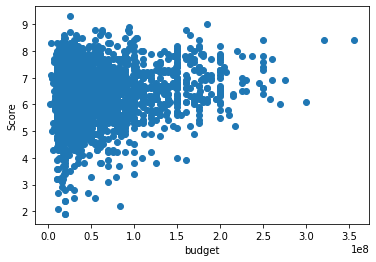

In [110]:
plt.scatter(Merged_Movie_df.budget	 , Merged_Movie_df.score)
plt.xlabel('budget')
plt.ylabel('Score')
plt.show()

In [ ]:
# Drop the non-beneficial columns.
# Movies_df = Merged_Movie_df.drop(['Release Date','name','rating','genre','year', 'released','director','writer','star'], axis=1)


# Movies_df.head()

In [ ]:
# Hot encoding categorical columns
# loans_binary_encoded = pd.get_dummies(loans_df, columns=["education", "gender"])
# loans_binary_encoded.head()

In [ ]:
# Hot incode method using label encoder
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df2 = loans_df.copy()
#df2['education'] = le.fit_transform(df2['education']) 
#df2.head()

In [ ]:
Movies_df.dtypes

In [ ]:
# Select all of the columns with a object dtype
Movies_df.select_dtypes(include = 'object') 